## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Datasets

In [3]:
avg_income = pd.read_csv('MEHOINUSA672N.csv')
hpi = pd.read_csv('CSUSHPISA.csv')
housing_units = pd.read_csv('units_us.csv')
mortgage = pd.read_csv('MORTGAGE30US.csv')
unemployment = pd.read_csv("GeoFRED_Unemployment_Rate_by_County_Percent.csv")
rent_index = pd.read_csv("rentindex.csv")

## Preprocessing and Cleaning Dataset

In [4]:
housing_units

,Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Units,"11,63,34,360","11,80,73,715","11,97,62,541","12,15,25,460","12,34,18,565","12,54,58,161","12,73,94,236","12,91,86,575","13,05,22,504","13,13,40,117","13,18,25,383","13,23,12,816","13,28,34,047","13,35,38,615","13,43,88,318","13,52,85,123","13,62,86,436","13,73,66,902","13,85,16,439"


In [5]:
# Transposing housing dataset

housing_units = housing_units.T
housing_units['Year'] = housing_units.index

# Reseting index
housing_units.index.name = None
housing_units = housing_units.reset_index(drop= True)

# Renaming column name
housing_units.rename(index=str, columns={0: "Units"}, inplace=True)
housing_units = housing_units.iloc[1:,:]

#Converting str values to int
housing_units["Units"] = housing_units["Units"].str.replace(",", "").astype(int)
housing_units

,Units,Year
1,116334360,2000
2,118073715,2001
3,119762541,2002
4,121525460,2003
5,123418565,2004
6,125458161,2005
7,127394236,2006
8,129186575,2007
9,130522504,2008
10,131340117,2009


In [6]:
# Converting dates to date format to extract year
rent_index['DATE'] = pd.to_datetime(rent_index.DATE)
rent_index['Year'] = rent_index['DATE'].dt.year
rent_index = rent_index[['Year','CUUR0000SEHA']]
rent_index

,Year,CUUR0000SEHA
0,2000,181.100
1,2000,181.500
2,2000,182.000
3,2000,182.300
4,2000,182.700
...,...,...
223,2018,320.651
224,2018,321.533
225,2018,322.628
226,2018,323.968


In [7]:
# Calculating mean rent year wise
rent_index_avg = rent_index.groupby(['Year']).mean()
rent_index_avg['Year'] = rent_index_avg.index

# Reseting index
rent_index_avg.index.name = None
rent_index_avg = rent_index_avg.reset_index(drop=True)
rent_index_avg

,CUUR0000SEHA,Year
0,183.925000,2000
1,192.116667,2001
2,199.666667,2002
3,205.516667,2003
4,211.025000,2004
5,217.341667,2005
6,225.091667,2006
7,234.678917,2007
8,243.271167,2008
9,248.811583,2009


In [8]:
unemployment = unemployment.drop(['Series ID', 'Region Name', 'Region Code'], axis = 1)
unemployment

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,3.8,6.6,7.7,9.1,8.2,7.7,8.8,8.1,8.1,14.2,13.6,12.5,10.6,9.5,7.7,6.9,5.5,4.6,4.2
1,5.8,6.0,6.3,6.8,5.8,6.1,3.6,3.8,4.2,6.5,7.3,6.7,6.0,6.0,5.8,6.9,7.4,5.9,5.4
2,3.0,3.4,4.2,4.4,4.7,4.7,4.3,4.1,5.0,6.5,7.9,8.4,7.9,7.2,6.7,5.5,5.0,4.9,4.1
3,3.4,3.9,4.7,4.9,4.1,3.3,2.7,2.7,4.9,8.9,8.3,7.3,6.2,5.2,4.2,3.7,3.3,2.8,2.4
4,3.5,4.1,4.8,7.8,6.2,4.8,4.4,4.7,4.9,8.0,10.5,9.2,9.1,9.8,8.0,6.1,5.9,5.0,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,2.6,2.3,2.4,3.0,3.2,3.1,2.6,2.1,2.7,3.3,5.6,5.3,5.1,4.8,3.4,2.6,2.1,1.6,2.0
3132,16.3,16.8,16.8,16.8,15.8,15.8,14.9,14.0,18.2,22.9,25.0,24.1,23.8,25.4,22.8,21.6,18.7,17.0,16.9
3133,8.0,7.2,8.7,8.8,7.2,6.6,6.1,5.3,5.5,10.9,10.4,8.1,6.3,6.2,5.2,7.7,10.8,7.3,5.4
3134,12.3,13.2,14.4,13.8,12.4,11.6,11.7,10.5,10.6,14.5,13.9,14.1,13.5,14.5,12.1,11.2,13.9,11.1,9.7


In [9]:
# Calculating mean of unemployement rate year wise
unemployment_avg = unemployment.mean(axis = 0)
unemployment_avg = unemployment_avg.to_frame()
unemployment_avg['Year'] = unemployment_avg.index

# Renaming columns and reseting index
unemployment_avg.rename(index=str, columns={0: "Unemployment Rate"}, inplace=True)
unemployment_avg.index.name = None
unemployment_avg = unemployment_avg.reset_index(drop=True)

unemployment_avg

,Unemployment Rate,Year
0,4.384471,2000
1,5.049841,2001
2,5.768048,2002
3,6.033355,2003
4,5.699235,2004
5,5.461001,2005
6,4.964062,2006
7,4.885874,2007
8,5.831537,2008
9,9.066645,2009


In [10]:
# Converting dates to date format to extract year

mortgage['DATE'] = pd.to_datetime(mortgage.DATE)
mortgage['Year'] = mortgage['DATE'].dt.year
mortgage = mortgage[['Year','MORTGAGE30US']]
mortgage

,Year,MORTGAGE30US
0,2000,8.15
1,2000,8.18
2,2000,8.26
3,2000,8.25
4,2000,8.25
...,...,...
986,2018,4.81
987,2018,4.75
988,2018,4.63
989,2018,4.62


In [11]:
# Calculating mean mortage rate index year wise

mortgage_avg = mortgage.groupby(['Year']).mean()
mortgage_avg['Year'] = mortgage_avg.index

# Reseting index
mortgage_avg.index.name = None
mortgage_avg = mortgage_avg.reset_index(drop= True)
mortgage_avg = mortgage_avg[["Year", "MORTGAGE30US"]]
mortgage_avg

,Year,MORTGAGE30US
0,2000,8.053462
1,2001,6.967885
2,2002,6.537308
3,2003,5.826981
4,2004,5.839231
5,2005,5.866731
6,2006,6.413269
7,2007,6.337308
8,2008,6.027170
9,2009,5.036538


In [12]:
hpi = hpi.dropna()
# Converting dates to date format to extract year
hpi['DATE'] = pd.to_datetime(hpi.DATE)
hpi['Year'] = hpi['DATE'].dt.year
hpi = hpi[['Year','CSUSHPISA']]
hpi

,Year,CSUSHPISA
0,2000,100.552
1,2000,101.339
2,2000,102.126
3,2000,102.922
4,2000,103.677
...,...,...
223,2018,203.791
224,2018,204.325
225,2018,204.980
226,2018,205.468


In [13]:
# Calculating mean HPI year wise

hpi = hpi.groupby(['Year']).mean()
hpi['Year'] = hpi.index
# reseting index
hpi.index.name = None
hpi = hpi.reset_index(drop= True)
hpi

,CSUSHPISA,Year
0,104.768083,2000
1,113.178667,2001
2,122.278250,2002
3,133.731083,2003
4,150.439167,2004
5,171.736833,2005
6,183.448250,2006
7,179.920083,2007
8,164.058583,2008
9,148.543083,2009


In [14]:
# Converting dates to date format to extract year

avg_income['DATE'] = pd.to_datetime(avg_income.DATE)
avg_income['Year'] = avg_income['DATE'].dt.year
avg_income = avg_income[['Year','MEHOINUSA672N']]
avg_income.index.name = None
avg_income = avg_income.reset_index(drop= True)
avg_income

,Year,MEHOINUSA672N
0,2000,62512
1,2001,61126
2,2002,60435
3,2003,60360
4,2004,60150
5,2005,60794
6,2006,61268
7,2007,62090
8,2008,59877
9,2009,59458


## Creating final dataset

In [15]:
# Merging different dataset
dataset = mortgage_avg
dataset = dataset.merge(avg_income, on="Year")
dataset = dataset.merge(rent_index_avg, on="Year")
dataset = dataset.merge(hpi, on="Year")

# Not using merge because year in these two dataset is value and not object
dataset['AverageUnemployement'] = unemployment_avg["Unemployment Rate"]
dataset['HousingUnits'] = housing_units["Units"].values

# Renaming columns
dataset.rename(index=str, columns={"MORTGAGE30US": "MortgageIndex", "MEHOINUSA672N": "AverageIncome", "CUUR0000SEHA" : "AverageRentIndex", "CSUSHPISA":"HPI"}, inplace=True)
dataset

,Year,MortgageIndex,AverageIncome,AverageRentIndex,AverageUnemployement,HousingUnits,HPI
0,2000,8.053462,62512,183.925000,4.384471,116334360,104.768083
1,2001,6.967885,61126,192.116667,5.049841,118073715,113.178667
2,2002,6.537308,60435,199.666667,5.768048,119762541,122.278250
3,2003,5.826981,60360,205.516667,6.033355,121525460,133.731083
4,2004,5.839231,60150,211.025000,5.699235,123418565,150.439167
5,2005,5.866731,60794,217.341667,5.461001,125458161,171.736833
6,2006,6.413269,61268,225.091667,4.964062,127394236,183.448250
7,2007,6.337308,62090,234.678917,4.885874,129186575,179.920083
8,2008,6.027170,59877,243.271167,5.831537,130522504,164.058583
9,2009,5.036538,59458,248.811583,9.066645,131340117,148.543083


## Finding coorelation amoung different features

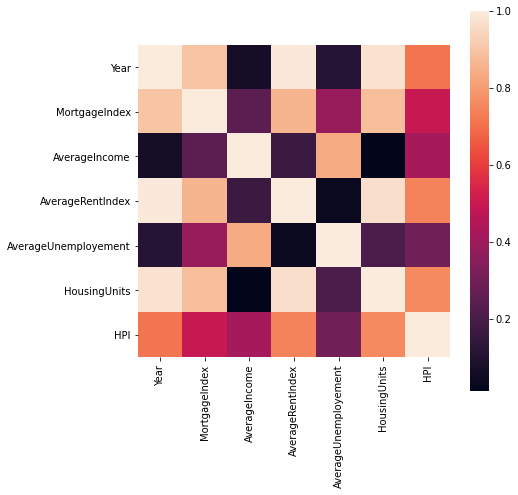

In [15]:
corrmat = dataset.corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat.abs(), vmax=1, square=True)

In [16]:
# Saving dataset
dataset.to_csv('dataset.csv',index = False)

## Data Preprocessing 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset.csv")

dataset = dataset.values

# Getting dataset without Year 
dataset = dataset[:, 1:]

# Getting feature and label set
x, y = dataset[:,:-1], dataset[:, -1]

# Splitting train and set dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=777)

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
scaler = MinMaxScaler()

In [19]:
X_train= scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## Model Building - Linear Regression 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [21]:
lm = LinearRegression()
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)
r2_score(y_test, y_pred_lm)

0.6127867291982312

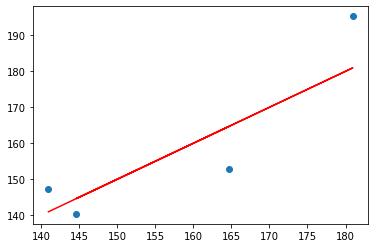

In [22]:
# Our predictions
plt.scatter(y_test,y_pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Model Building - Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [24]:
np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_score(y_test, y_pred_rf)

0.8463321986466128

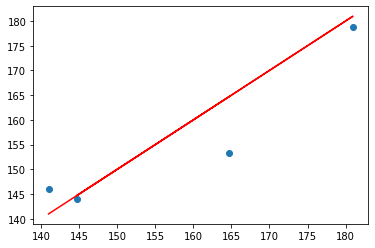

In [25]:
# Our predictions
plt.scatter(y_test,y_pred_rf)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Model Building - XGBoost 

In [26]:
from xgboost import XGBRegressor

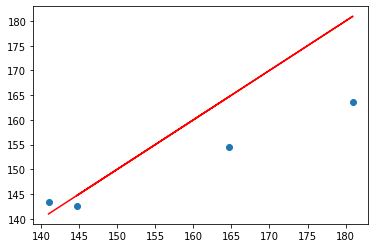

In [27]:
xgboost = XGBRegressor(objective ='reg:squarederror', 
                       colsample_bytree = 0.3, 
                       learning_rate = 0.1,
                       max_depth = 5, 
                       alpha = 10, 
                       random_state=777,
                       n_estimators = 100)
xgboost.fit(X_train, y_train)

y_prediction = xgboost.predict(X_test)

r2_score(y_test, y_prediction)
# Our predictions
plt.scatter(y_test,y_prediction)

# Perfect predictions
plt.plot(y_test,y_test,'r')

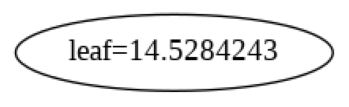

In [28]:
from xgboost import plot_tree
from xgboost import to_graphviz
import matplotlib.pyplot as plt

plot_tree(xgboost)
plt.show()

for i in range(100):
    dot = to_graphviz(xgboost, num_trees=i)
    dot.render("trees{0}".format(i))

In [29]:
print("These are the importance of each feature: {0}".format(xgboost.feature_importances_))

These are the importance of each feature: [0.18983936 0.17153202 0.2501124  0.08369477 0.3048214 ]


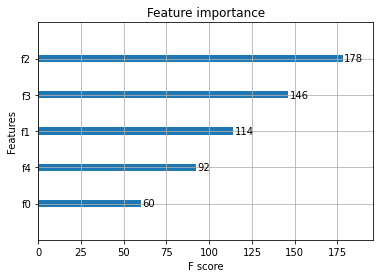

In [30]:
# Plotting Featrue importance

from xgboost import plot_importance
plot_importance(xgboost)
plt.show()